<a href="https://colab.research.google.com/github/Siuumanth/Machine-Learning-and-other-notebookshow/blob/main/NN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
# prompt: import msnit dataset
import tensorflow as tf
import numpy as np
import matplotlib as plt
#from keras.datasets import mnist
import pandas as pd


In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Now we have 60000 training and 10000 testing examples

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train=X_train.reshape(60000, -1).T
X_test=X_test.reshape(10000, -1).T
X_train=X_train/255
X_test=X_test/255

In [ ]:
print(y_train.shape)

(60000,)


In [ ]:
X_train.shape

(784, 60000)

In [ ]:
print(X_train[:,0].shape) # this is our first column
m=X_train.shape[1]
n=X_train.shape[0]

(784,)


In [ ]:
print(m,n)

60000 784


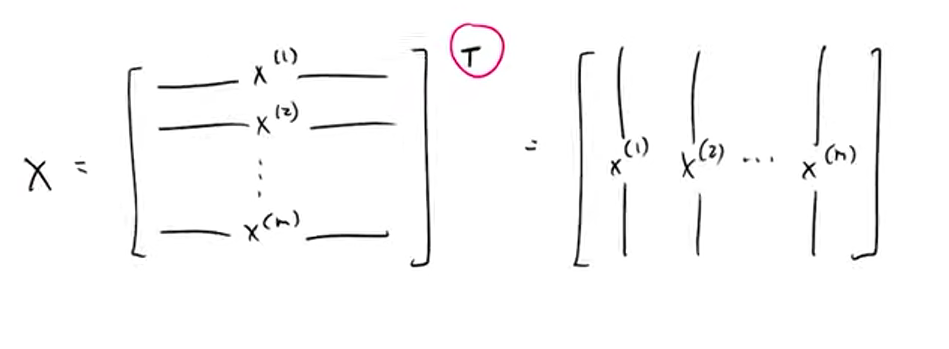

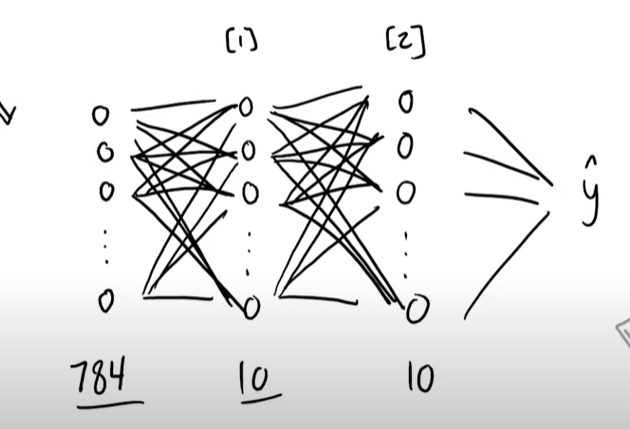

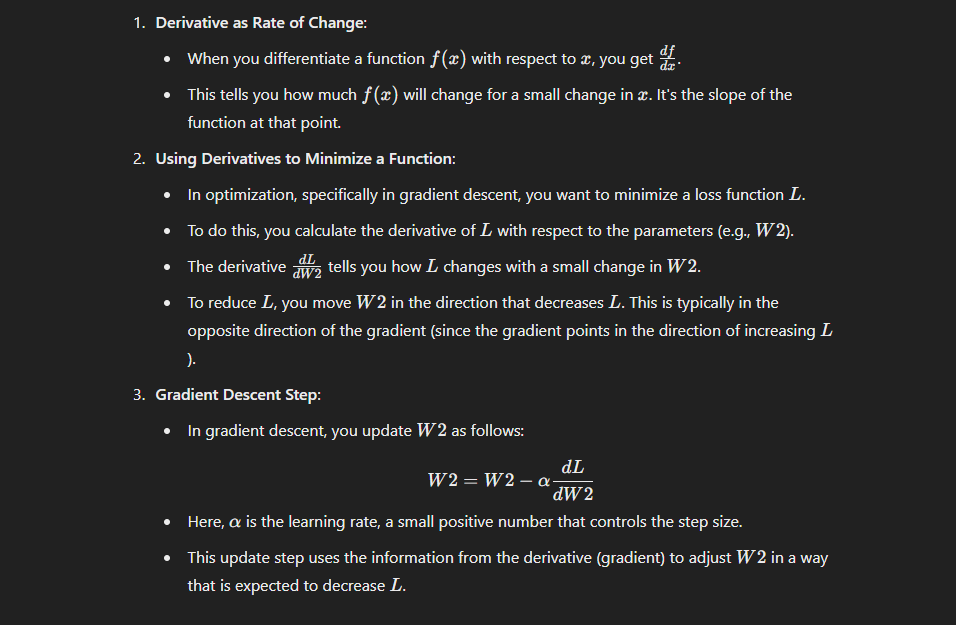

### So we are gonna have 784 input neurons,1 hidden layer , 10 nodes , and 10 ouput classes

So for layer 0 to 1, we need 784 weights and 10 biases

for layer 1 to 2 , we need 10 weights and 10 biases

In [ ]:
#initialising parameters
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
  return np.maximum(Z,0);

#def softmax(Z):
#  A = np.exp(Z) / sum(np.exp(Z))
#  return A

def deriv_RelU(Z):
  return Z > 0
# this function, as in 1st quadrant, slope is 1 , and 2nd quadrant , slope is 0, it returns 1 or 0


def softmax(Z):
    # Subtract the max value in Z to prevent overflow
    Z_shifted = Z - np.max(Z, axis=0, keepdims=True)
    exp_Z = np.exp(Z_shifted)
    A = exp_Z / np.sum(exp_Z, axis=0, keepdims=True)
    return A

#forward propagration, see what happens in a pass
def forward_prop(W1,b1,W2,b2,X):
  Z1 = W1.dot(X) + b1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = softmax(Z2)
  return Z1,A1,Z2,A2



def one_hot(Y):   #one hot encoding Y, creating an array of len 10 with all values except label as 0
  one_hot_Y=np.zeros((Y.size,Y.max()+1))
  one_hot_Y[np.arange(Y.size),Y] = 1
  one_hot_Y=one_hot_Y.T #flipping it
  return one_hot_Y


def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dZ1 = W2.T.dot(dZ2) * deriv_RelU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    return dW1, db1, dW2, db2



def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - (alpha * dW1)
    b1 = b1 - (alpha * db1 )
    W2 = W2 - (alpha * dW2 )
    b2 = b2 - (alpha * db2 )
    return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size


def gradient_descent(X,Y,iterations,alpha):
  W1,b1,W2,b2=init_params()
  for i in range(iterations):
    Z1,A1,Z2,A2 = forward_prop(W1,b1,W2,b2,X)     #from forward prop, we get the functions values
    dW1,db1,dW2,db2 = back_prop(Z1,A1,Z2,A2,W1,W2,X,Y)    #From backward prop we get the errors
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)    #update the parameters

    if i % 50 == 0:
      print("Iteration: ", i)
      predictions = get_predictions(A2)
      print("Accuray : ", get_accuracy(predictions, Y))
      #print(f"W1 = {W1[0][0]}"
      #print(f"dW1 = {dW1[0][0]}")
      print()
  return W1, b1, W2, b2


W1, b1, W2, b2 = gradient_descent(X_train, y_train,600,0.1)

Iteration:  0
[3 0 3 ... 3 4 3] [5 0 4 ... 5 6 8]
Accuray :  0.08845

Iteration:  50
[9 0 4 ... 3 4 8] [5 0 4 ... 5 6 8]
Accuray :  0.4025

Iteration:  100
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
Accuray :  0.6166166666666667

Iteration:  150
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
Accuray :  0.70885

Iteration:  200
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
Accuray :  0.7520166666666667

Iteration:  250
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
Accuray :  0.7791

Iteration:  300
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
Accuray :  0.7985

Iteration:  350
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
Accuray :  0.8136166666666667

Iteration:  400
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
Accuray :  0.8259

Iteration:  450
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
Accuray :  0.8350833333333333

Iteration:  500
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
Accuray :  0.8430333333333333

Iteration:  550
[5 0 4 ... 5 6 8] [5 0 4 ... 5 6 8]
Accuray :  0.8495333333333334



In [ ]:
print(X_train.shape)

(784, 60000)
